In [1]:
from ds_nms import model_train

import joblib
import pandas as pd

___
## <center><a id=1 style='color:red'>Импорт данных</a>

In [2]:
data_initial = pd.read_excel("data/Data(2).xlsx")

display(data_initial.head(3))
data_initial.shape

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
0,1,Генерала Тюленева,3700,961,288,33349.734790,0.000000,9024.025364,0.000000,16794.209437,0.0,2601.096069,0.000000,2
1,2,Университет Дружбы Народов,9470,500,1700,44319.392083,0.000000,22920.388808,0.000000,0.000000,0.0,524163.822269,0.000000,1
2,7,Коптево,19151,2287,1849,61779.220594,13030.090191,24263.766188,4200.174302,6424.672688,0.0,41312.099110,4825.454481,2


(132, 14)

In [3]:
df = data_initial[
    (data_initial["tpu name"] == "Панфиловская")
    | (data_initial["tpu name"] == "Нагорная")
    | (data_initial["tpu name"] == "Раменки")
]

df

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
29,695,Панфиловская,8304,929,1071,17934.552943,0.00000,9796.128666,0.000000,332.581508,0.000000,55639.104979,0.0,2
39,1142,Нагорная,18992,2061,1755,38432.246015,2013.23864,19641.047288,2085.829880,152387.862847,129922.856437,8017.216771,0.0,2
69,2230,Раменки,21394,2310,1952,44892.262135,8143.30891,15257.067986,2336.098291,22396.706737,0.000000,17950.498984,0.0,2


___
## <center><a id=1 style='color:red'>Преобразование данных</a>

In [4]:
PATH_SCALERS = "data/scalers/"

scaler_std_1 = joblib.load(f"{PATH_SCALERS}std_scaler.pkl")
features_names = scaler_std_1.feature_names_in_

scaler_std_1

StandardScaler()

In [5]:
X = df.loc[:, features_names]
Y_1 = df.loc[:, ["sum validations"]]

display(X)
display(Y_1)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
29,17934.552943,0.00000,9796.128666,0.000000,332.581508,0.000000,55639.104979,0.0,2
39,38432.246015,2013.23864,19641.047288,2085.829880,152387.862847,129922.856437,8017.216771,0.0,2
69,44892.262135,8143.30891,15257.067986,2336.098291,22396.706737,0.000000,17950.498984,0.0,2


,sum validations
29,8304
39,18992
69,21394


In [6]:
X_std_1 = scaler_std_1.transform(X)

df_std_1 = pd.DataFrame(X_std_1, columns=X.columns)
display(df_std_1)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
0,-0.767008,-0.493346,-1.272927,-0.599711,-0.357277,-0.252852,-0.193009,-0.350369,-4.435752
1,-0.047487,-0.281388,-0.235296,0.005001,0.221458,8.971859,-0.753755,-0.350369,-4.435752
2,0.179276,0.364001,-0.697357,0.077557,-0.273299,-0.252852,-0.636791,-0.350369,-4.435752


___
## <center><a id=1 style='color:red'>Загрузка моделей</a>

In [7]:
PATH = "models/std/"

trained_lasso_std_1 = joblib.load(f"{PATH}lasso_std_1.pkl")

display(trained_lasso_std_1)


Lasso(alpha=1000)

___
### Feature importance check

- Cluster 0 reduced 15

In [8]:
display(trained_lasso_std_1.coef_)

array([    0.        ,    -0.        , 13280.88972311, -2282.81913419,
           0.        ,     0.        ,  -642.2143585 ,     0.        ,
        1177.8466461 ])

___
## <center><a id=1 style='color:red'>Предсказания</a>

In [9]:
y1_pred = trained_lasso_std_1.predict(X_std_1)

y1_pred

/home/nazarov/Github/ds_nms/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names


array([12122.12266642, 24882.46164885, 18505.12989043])

___
## <center><a id=1 style='color:red'>Интерпретация</a>

- Исходные данные

In [10]:
X_sample = X.loc[69, :].to_frame(name="Раменки").T
y_sample = Y_1.loc[69]

display(X_sample)
display(y_sample)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
Раменки,44892.262135,8143.30891,15257.067986,2336.098291,22396.706737,0.0,17950.498984,0.0,2.0


sum validations    21394
Name: 69, dtype: int64

___

Сумма вкладов признаков и предсказание совпадают: True -> [18505.12989043]
Коэффициенты в исходном масштабе: [ 0.         -0.          1.39977457 -0.66182148  0.          0.
 -0.00756205  0.          0.1605817 ]
Свободный член в исходном масштабе: -1169.8243008877726


/home/nazarov/Github/ds_nms/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
Раменки,0.0,-0.0,19518.587675,-677.125432,0.0,-0.0,-125.81387,-0.0,-210.518483


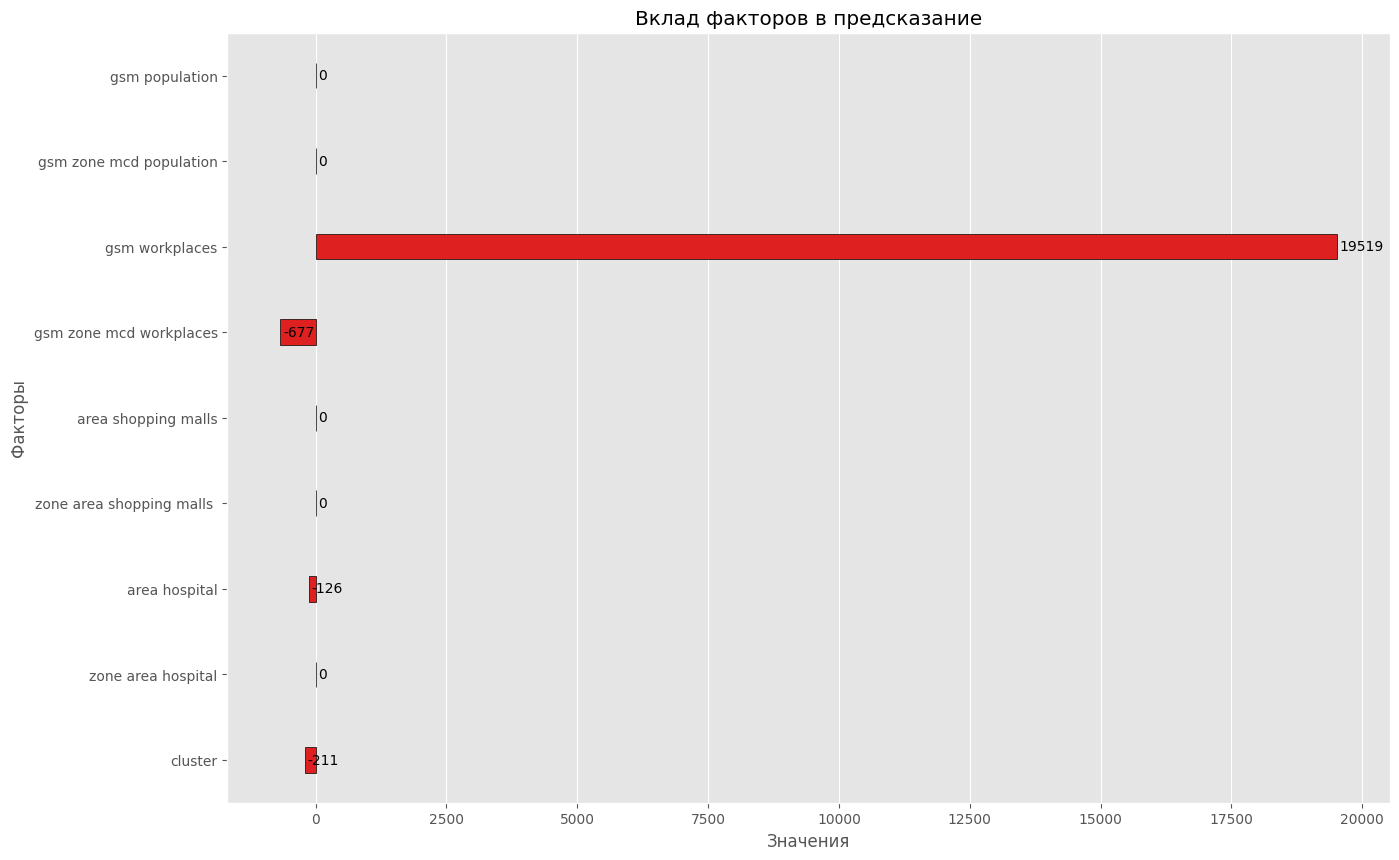

In [11]:
model_train.get_feature_contrib(X_orig=X_sample,
                                model=trained_lasso_std_1,
                                scaler=scaler_std_1)